In [1]:
import numpy as np
import sklearn
from tensorflow import keras
import tensorflow as tf
from keras.datasets import mnist
from matplotlib import pyplot as plt

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
#Aqui a gente não vai usar o y

11493376/11490434 [==============================] - 3s 0us/step


In [4]:
print(train_X.shape)
print(test_X.shape)

(60000, 28, 28)
(10000, 28, 28)


3


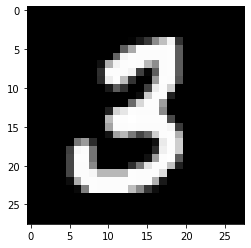

In [5]:
i = np.random.choice(range(len(train_X)))
plt.imshow(train_X[i], cmap = 'gray')
print(train_y[i])

In [6]:
train_X = train_X.reshape(60000,28,28,1)
test_X = test_X.reshape(10000,28,28,1)

In [13]:
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Flatten
from keras.models import Sequential

model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(padding='same'))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(16, kernel_size=4, activation='relu'))
model.add(MaxPooling2D(padding='same'))
#model.add(UpSampling2D())
model.add(Conv2D(16, kernel_size=4, activation='relu'))
model.add(MaxPooling2D(padding='same'))
model.add(Dense(1, activation='softmax'))
model.add(UpSampling2D(size=(14,14)))
#model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(UpSampling2D(size=(2,2)))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 16)          8208      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 1, 1, 16)          4112      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 1, 1, 16)         

In [16]:
model.compile(optimizer = 'rmsprop', loss = 'mse')

model.fit(x = train_X, y = train_X, batch_size = 60, epochs = 10, validation_data = (test_X, test_X))

Epoch 1/10
1000/1000 [==============================] - 109s 109ms/step - loss: 7217.3320 - val_loss: 7343.5415
Epoch 2/10
1000/1000 [==============================] - 110s 110ms/step - loss: 7217.3271 - val_loss: 7343.5415
Epoch 3/10
1000/1000 [==============================] - 123s 123ms/step - loss: 7217.3311 - val_loss: 7343.5415
Epoch 4/10
1000/1000 [==============================] - 116s 116ms/step - loss: 7217.3335 - val_loss: 7343.5415
Epoch 5/10
1000/1000 [==============================] - 114s 114ms/step - loss: 7217.3281 - val_loss: 7343.5415
Epoch 6/10
1000/1000 [==============================] - 112s 112ms/step - loss: 7217.3296 - val_loss: 7343.5415
Epoch 7/10
1000/1000 [==============================] - 111s 111ms/step - loss: 7217.3340 - val_loss: 7343.5415
Epoch 8/10
1000/1000 [==============================] - 110s 110ms/step - loss: 7217.3296 - val_loss: 7343.5415
Epoch 9/10
1000/1000 [==============================] - 119s 119ms/step - loss: 7217.3320 - val_loss: 73

In [17]:
model.fit(x = train_X, y = train_X, batch_size = 80, epochs = 20, validation_data = (test_X, test_X))

Epoch 1/20
750/750 [==============================] - 119s 159ms/step - loss: 7217.3281 - val_loss: 7343.5430
Epoch 2/20
750/750 [==============================] - 136s 181ms/step - loss: 7217.3301 - val_loss: 7343.5430
Epoch 3/20
750/750 [==============================] - 129s 172ms/step - loss: 7217.3291 - val_loss: 7343.5430
Epoch 4/20
750/750 [==============================] - 106s 141ms/step - loss: 7217.3311 - val_loss: 7343.5430
Epoch 5/20
750/750 [==============================] - 106s 141ms/step - loss: 7217.3306 - val_loss: 7343.5430
Epoch 6/20
750/750 [==============================] - 135s 180ms/step - loss: 7217.3320 - val_loss: 7343.5430
Epoch 7/20
750/750 [==============================] - 103s 138ms/step - loss: 7217.3306 - val_loss: 7343.5430
Epoch 8/20
750/750 [==============================] - 108s 144ms/step - loss: 7217.3286 - val_loss: 7343.5430
Epoch 9/20
750/750 [==============================] - 111s 148ms/step - loss: 7217.3281 - val_loss: 7343.5430
Epoch 10/2

In [ ]:
model.fit(x = train_X, y = train_X, batch_size = 15, epochs = 15, verbose = 2, validation_split = 0.1)

In [ ]:
model.save('Autoencoder.h5')

In [ ]:
pred_X_train = model.predict(train_X)
pred_X_test = model.predict(test_X)

In [ ]:
i = np.random.choice(range(len(train_X)))
plt.imshow(pred_X_train[i].reshape(28,28), cmap = 'gray')
print(train_y[i])

In [ ]:
i = np.random.choice(range(len(test_X)))
plt.imshow(pred_X_train[i].reshape(28,28), cmap = 'gray')
print(train_y[i])